# Efek Pandemi COVID-19 pada Peningkatan Jumlah Pekerja di Bawah Umur

## *Importing Libraries*

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-v0_8')

## *Exploratory Data Analysis*

### Persentase jumlah pekerja berumur 10 hingga 17 tahun berdasarkan provinsi di Indonesia.

In [61]:
persentase_pekerja_anak = pd.read_excel('databases/labored-children/pekerja-anak-provinsi.xlsx')
persentase_pekerja_anak.head()

,Provinsi,Persentase anak usia 10-17 tahun yang bekerja menurut provinsi (Persen),Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,2019.00,2020.00,2021.00,2018.00
1,ACEH,1.18,1.98,1.39,1.68
2,SUMATERA UTARA,4.01,6.39,4.83,4.29
3,SUMATERA BARAT,2.46,4.29,2.64,2.51
4,RIAU,2.21,3.37,2.87,1.92


In [62]:
persentase_pekerja_anak.loc[0, 'Provinsi'] = 'provinsi'
persentase_pekerja_anak.columns = persentase_pekerja_anak.iloc[0, :]
persentase_pekerja_anak.drop(0, axis=0, inplace=True)
persentase_pekerja_anak.head()

,provinsi,2019.0,2020.0,2021.0,2018.0
1,ACEH,1.18,1.98,1.39,1.68
2,SUMATERA UTARA,4.01,6.39,4.83,4.29
3,SUMATERA BARAT,2.46,4.29,2.64,2.51
4,RIAU,2.21,3.37,2.87,1.92
5,JAMBI,2.06,2.43,1.86,2.88


In [63]:
persentase_pekerja_anak.set_index('provinsi', inplace=True)
persentase_pekerja_anak.columns = pd.to_datetime(persentase_pekerja_anak.columns.astype(int).astype(str))
persentase_pekerja_anak.head()

,2019-01-01,2020-01-01,2021-01-01,2018-01-01
provinsi,,,,
ACEH,1.18,1.98,1.39,1.68
SUMATERA UTARA,4.01,6.39,4.83,4.29
SUMATERA BARAT,2.46,4.29,2.64,2.51
RIAU,2.21,3.37,2.87,1.92
JAMBI,2.06,2.43,1.86,2.88


In [64]:
persentase_pekerja_anak = persentase_pekerja_anak.T.reset_index()
persentase_pekerja_anak.head()

provinsi,0,ACEH,SUMATERA UTARA,SUMATERA BARAT,RIAU,JAMBI,SUMATERA SELATAN,BENGKULU,LAMPUNG,KEP. BANGKA BELITUNG,...,SULAWESI TENGAH,SULAWESI SELATAN,SULAWESI TENGGARA,GORONTALO,SULAWESI BARAT,MALUKU,MALUKU UTARA,PAPUA BARAT,PAPUA,INDONESIA
0,2019-01-01,1.18,4.01,2.46,2.21,2.06,2.27,1.99,2.20,2.41,...,4.04,4.90,5.26,4.57,3.46,3.04,3.51,2.30,3.17,2.35
1,2020-01-01,1.98,6.39,4.29,3.37,2.43,3.41,2.98,4.01,4.81,...,5.59,6.16,8.05,5.46,5.28,3.35,3.80,5.35,3.49,3.25
2,2021-01-01,1.39,4.83,2.64,2.87,1.86,2.76,1.94,3.56,3.30,...,5.12,5.33,6.46,4.28,5.50,2.49,2.12,3.81,3.25,2.63
3,2018-01-01,1.68,4.29,2.51,1.92,2.88,2.32,2.56,2.55,4.26,...,4.67,4.63,5.32,4.56,3.70,2.14,2.42,2.19,4.20,2.61


In [65]:
persentase_pekerja_anak.rename(columns={0: "tahun"}, inplace=True)
persentase_pekerja_anak.set_index('tahun', inplace=True)
persentase_pekerja_anak.sort_index(inplace=True)
persentase_pekerja_anak.head()

provinsi,ACEH,SUMATERA UTARA,SUMATERA BARAT,RIAU,JAMBI,SUMATERA SELATAN,BENGKULU,LAMPUNG,KEP. BANGKA BELITUNG,KEP. RIAU,...,SULAWESI TENGAH,SULAWESI SELATAN,SULAWESI TENGGARA,GORONTALO,SULAWESI BARAT,MALUKU,MALUKU UTARA,PAPUA BARAT,PAPUA,INDONESIA
tahun,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1.68,4.29,2.51,1.92,2.88,2.32,2.56,2.55,4.26,1.09,...,4.67,4.63,5.32,4.56,3.70,2.14,2.42,2.19,4.20,2.61
2019-01-01,1.18,4.01,2.46,2.21,2.06,2.27,1.99,2.20,2.41,0.98,...,4.04,4.90,5.26,4.57,3.46,3.04,3.51,2.30,3.17,2.35
2020-01-01,1.98,6.39,4.29,3.37,2.43,3.41,2.98,4.01,4.81,1.19,...,5.59,6.16,8.05,5.46,5.28,3.35,3.80,5.35,3.49,3.25
2021-01-01,1.39,4.83,2.64,2.87,1.86,2.76,1.94,3.56,3.30,0.97,...,5.12,5.33,6.46,4.28,5.50,2.49,2.12,3.81,3.25,2.63


In [66]:
persentase_pekerja_anak.to_csv('databases/labored-children-cleaned/persentase_pekerja_anak.csv')

In [67]:
persentase_pekerja_anak.columns

Index(['ACEH', 'SUMATERA UTARA', 'SUMATERA BARAT', 'RIAU', 'JAMBI',
       'SUMATERA SELATAN', 'BENGKULU', 'LAMPUNG', 'KEP. BANGKA BELITUNG',
       'KEP. RIAU', 'DKI JAKARTA', 'JAWA BARAT', 'JAWA TENGAH',
       'DI YOGYAKARTA', 'JAWA TIMUR', 'BANTEN', 'BALI', 'NUSA TENGGARA BARAT',
       'NUSA TENGGARA TIMUR', 'KALIMANTAN BARAT', 'KALIMANTAN TENGAH',
       'KALIMANTAN SELATAN', 'KALIMANTAN TIMUR', 'KALIMANTAN UTARA',
       'SULAWESI UTARA', 'SULAWESI TENGAH', 'SULAWESI SELATAN',
       'SULAWESI TENGGARA', 'GORONTALO', 'SULAWESI BARAT', 'MALUKU',
       'MALUKU UTARA', 'PAPUA BARAT', 'PAPUA', 'INDONESIA'],
      dtype='object', name='provinsi')

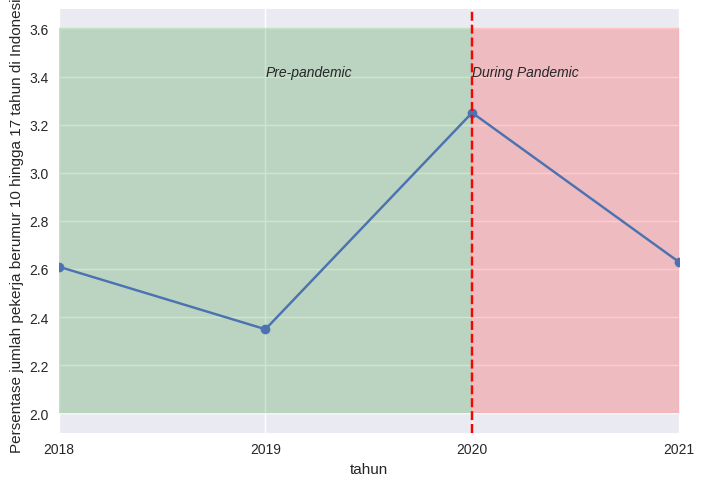

In [79]:
ax = persentase_pekerja_anak["INDONESIA"].plot(marker="o")
# create a seperator before and after 2020
plt.axvline(x="2020", color="red", linestyle="--")
fill_thresholds_min, fill_thresholds_max = (
    np.min(ax.get_yticks()) - 0.2,
    np.max(ax.get_yticks()) + 0.2,
)
ax.fill_between(
    persentase_pekerja_anak.index[:3],
    fill_thresholds_min,
    fill_thresholds_max,
    color="green",
    alpha=0.2,
)
ax.fill_between(
    persentase_pekerja_anak.index[2:],
    fill_thresholds_min,
    fill_thresholds_max,
    color="red",
    alpha=0.2,
)
ax.text("2020", fill_thresholds_max - 0.2, "During Pandemic", style="italic")
ax.text("2019", fill_thresholds_max - 0.2, "Pre-pandemic", style="italic")
plt.ylabel("Persentase jumlah pekerja berumur 10 hingga 17 tahun di Indonesia")
plt.show()


**Obersetvations:**
- Pandemi COVID-19 pada tahun 2020 menyebabkan peningkatan drastis angka pekerja anak di Indonesia

In [69]:
persentase_anak_gender = pd.read_excel('databases/labored-children/pekerja-anak-gender.xlsx')
persentase_anak_gender.head()

,Jenis Kelamin + Jumlah,Persentase anak usia 10-17 tahun yang bekerja menurut jenis kelamin (Persen),Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,2018.00,2019.00,2020.00,2021.00
1,Laki-laki,2.97,2.73,3.34,2.67
2,Perempuan,2.24,1.96,3.16,2.60
3,Laki-laki + Perempuan,2.61,2.35,3.25,2.63


In [70]:
persentase_anak_gender.loc[0, 'Jenis Kelamin + Jumlah'] = 'gender'
persentase_anak_gender.columns = persentase_anak_gender.iloc[0, :]
persentase_anak_gender.drop(0, axis=0, inplace=True)
persentase_anak_gender.drop(persentase_anak_gender.iloc[3:, :].index, axis=0, inplace=True)
persentase_anak_gender.head()

,gender,2018.0,2019.0,2020.0,2021.0
1,Laki-laki,2.97,2.73,3.34,2.67
2,Perempuan,2.24,1.96,3.16,2.60
3,Laki-laki + Perempuan,2.61,2.35,3.25,2.63


In [71]:
persentase_anak_gender.set_index('gender', inplace=True)
persentase_anak_gender.columns = pd.to_datetime(persentase_anak_gender.columns.astype(int).astype(str))
persentase_anak_gender.head()

,2018-01-01,2019-01-01,2020-01-01,2021-01-01
gender,,,,
Laki-laki,2.97,2.73,3.34,2.67
Perempuan,2.24,1.96,3.16,2.60
Laki-laki + Perempuan,2.61,2.35,3.25,2.63


In [72]:
persentase_anak_gender = persentase_anak_gender.T.reset_index()
persentase_anak_gender.rename(columns={0: "tahun"}, inplace=True)
persentase_anak_gender.set_index('tahun', inplace=True)
persentase_anak_gender.sort_index(inplace=True)
persentase_anak_gender.head()

gender,Laki-laki,Perempuan,Laki-laki + Perempuan
tahun,,,
2018-01-01,2.97,2.24,2.61
2019-01-01,2.73,1.96,2.35
2020-01-01,3.34,3.16,3.25
2021-01-01,2.67,2.60,2.63


In [73]:
persentase_anak_gender.to_csv("databases/labored-children-cleaned/persentase_anak_gender.csv")

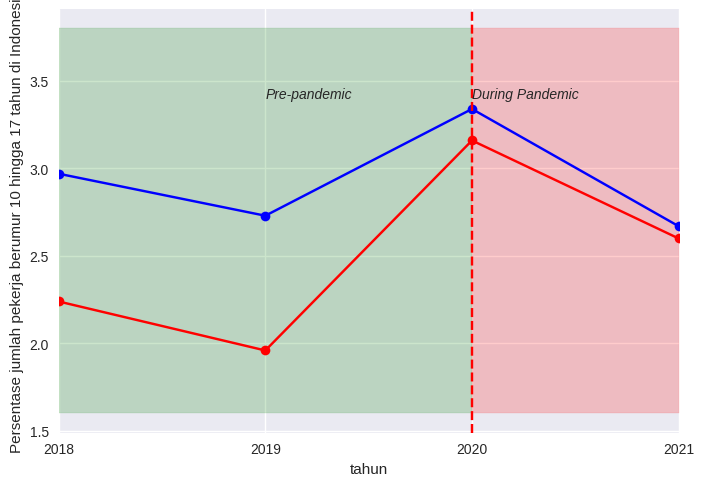

In [80]:
ax = persentase_anak_gender["Laki-laki"].plot(marker="o", color="b")
ax = persentase_anak_gender["Perempuan"].plot(marker="o", color="r")
# create a seperator before and after 2020
plt.axvline(x="2020", color="red", linestyle="--")
fill_thresholds_min, fill_thresholds_max = (
    np.min(ax.get_yticks()) - 0.2,
    np.max(ax.get_yticks()) + 0.2,
)
ax.fill_between(
    persentase_pekerja_anak.index[:3],
    fill_thresholds_min,
    fill_thresholds_max,
    color="green",
    alpha=0.2,
)
ax.fill_between(
    persentase_pekerja_anak.index[2:],
    fill_thresholds_min,
    fill_thresholds_max,
    color="red",
    alpha=0.2,
)
# create text top left
ax.text("2020", 3.4, "During Pandemic", style="italic")
ax.text("2019", 3.4, "Pre-pandemic", style="italic")
plt.ylabel("Persentase jumlah pekerja berumur 10 hingga 17 tahun di Indonesia")
plt.show()


**Observations:**
- Anak Laki-laki lebih banyak yang menjadi Pekerja Anak daripada Perempuan

In [75]:
persentase_anak_provinsi = persentase_pekerja_anak.loc['2021', :].T.reset_index()
persentase_anak_provinsi.columns = ['provinsi', 'persentase']
persentase_anak_provinsi.sort_values(by='persentase', ascending=False, inplace=True)
persentase_anak_provinsi.reset_index(drop=True, inplace=True)
persentase_anak_provinsi.head()

,provinsi,persentase
0,SULAWESI TENGGARA,6.46
1,KALIMANTAN UTARA,5.66
2,SULAWESI BARAT,5.50
3,SULAWESI SELATAN,5.33
4,SULAWESI TENGAH,5.12


In [76]:
persentase_anak_provinsi.to_csv('databases/labored-children-cleaned/persentase_anak_provinsi.csv', index=False)

<ipython-input-85-d6eed36d6445>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='provinsi', y='persentase', data=persentase_anak_provinsi, palette='Blues_d')


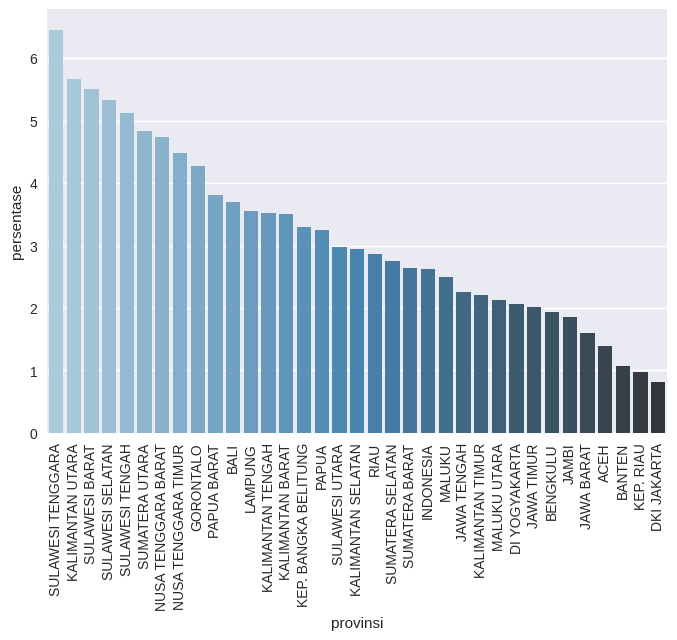

In [85]:
sns.barplot(x='provinsi', y='persentase', data=persentase_anak_provinsi, palette='Blues_d')
plt.xticks(rotation=90)
plt.show()

### Persentase jumlah pekerja di bawah umur di tahun 2020.

In [29]:
pekerja_anak_2020 = pd.read_excel('databases/labored-children/peningkatan-pekerja-anak.xlsx')
pekerja_anak_2020.head()

,nama_alias,10-12 tahun,13-14 tahun,15-17 tahun
0,2019,1.83,2.07,3.08
1,2020,3.60,3.34,2.85


In [30]:
pekerja_anak_2020.rename(columns={'nama_alias': 'tahun'}, inplace=True)
pekerja_anak_2020.set_index('tahun', inplace=True)
pekerja_anak_2020.head()

,10-12 tahun,13-14 tahun,15-17 tahun
tahun,,,
2019,1.83,2.07,3.08
2020,3.60,3.34,2.85


In [31]:
pekerja_anak_2020.to_csv('databases/labored-children-cleaned/pekerja_anak_2020.csv')

In [46]:
pekerja_anak_2020.reset_index(inplace=True)
pekerja_anak_2020.head()

,tahun,10-12 tahun,13-14 tahun,15-17 tahun
0,2019,1.83,2.07,3.08
1,2020,3.60,3.34,2.85


In [47]:
pd.melt(
     pekerja_anak_2020,
     id_vars=["tahun"],
     value_vars=["10-12 tahun", "13-14 tahun", "15-17 tahun"],
     var_name="provinsi",
     value_name="persentase_kenaikan",
 )

,tahun,provinsi,persentase_kenaikan
0,2019,10-12 tahun,1.83
1,2020,10-12 tahun,3.60
2,2019,13-14 tahun,2.07
3,2020,13-14 tahun,3.34
4,2019,15-17 tahun,3.08
5,2020,15-17 tahun,2.85


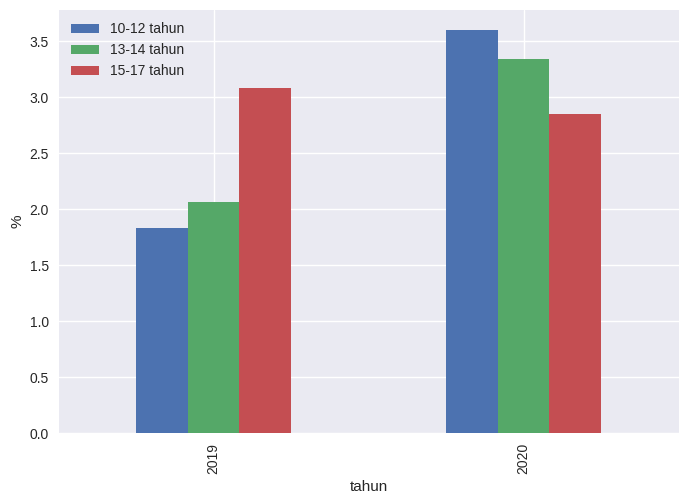

In [34]:
pekerja_anak_2020.plot(kind='bar')
plt.ylabel('%')
plt.show()

Di tahun 2020, ada peningkatan jumlah pekerja di bawah umur dari hampir semua rentang kategori umur yang mana paling drastis terjadi pada kalangan anak berumur 10-12 tahun yang nyaris dua kali lipat naik dari tahun sebelumnya (2019).

### Persentase jumlah anak yang putus sekolah kemudian menjadi pekerja di bawah umur.

In [35]:
pekerja_anak_sekolah = pd.read_excel('databases/labored-children/status-pekerja-anak.xlsx')
pekerja_anak_sekolah.head()

,nama_alias,tidak/blm pernah sekolah,masih bersekolah,tidak bersekolah lagi
0,2020,5.91,2.40,15.83
1,2021,2.82,2.04,15.03


In [36]:
pekerja_anak_sekolah.rename(columns={'nama_alias': 'tahun'}, inplace=True)
pekerja_anak_sekolah.set_index('tahun', inplace=True)
pekerja_anak_sekolah.head()

,tidak/blm pernah sekolah,masih bersekolah,tidak bersekolah lagi
tahun,,,
2020,5.91,2.40,15.83
2021,2.82,2.04,15.03


In [37]:
pekerja_anak_sekolah.to_csv('databases/labored-children-cleaned/pekerja_anak_sekolah.csv')

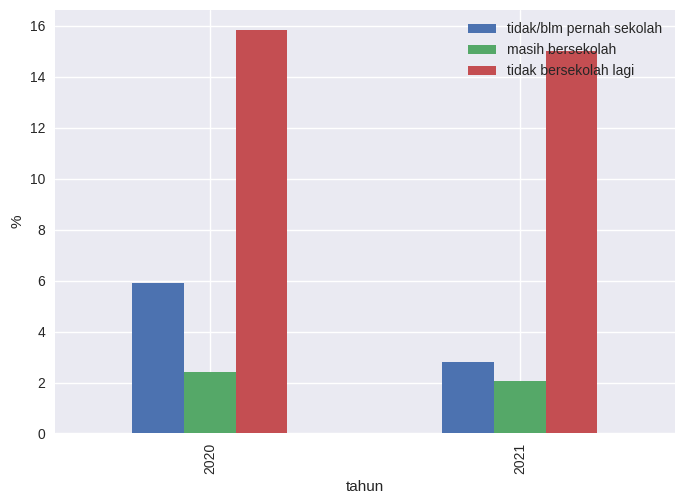

In [38]:
pekerja_anak_sekolah.plot(kind='bar')
plt.ylabel('%')
plt.show()

Pekerja di bawah umur didominasi oleh mereka yang putus sekolah dengan persentase sebesar 83% pada tahun 2020 dan 15.03% pada tahun 2021,

### Jumlah anak yang putus sekolah kemudian menjadi pekerja di bawah umur berdasarkan jenjang pendidikan.

In [39]:
aps = pd.read_excel('databases/labored-children/putus-sekolah-tingkat.xlsx')
aps.head()

,date,SD,SMP,SMK,SMA
0,2016-12-31,39213,38702,72744,36419
1,2017-12-31,32127,51190,73388,31123
2,2018-12-31,33268,28651,25357,15953
3,2019-12-31,59443,38464,32395,26864
4,2020-12-31,44516,11378,13951,13879


In [40]:
aps['date'] = pd.to_datetime(aps['date'])
aps.set_index('date', inplace=True)
aps.head()

,SD,SMP,SMK,SMA
date,,,,
2016-12-31,39213,38702,72744,36419
2017-12-31,32127,51190,73388,31123
2018-12-31,33268,28651,25357,15953
2019-12-31,59443,38464,32395,26864
2020-12-31,44516,11378,13951,13879


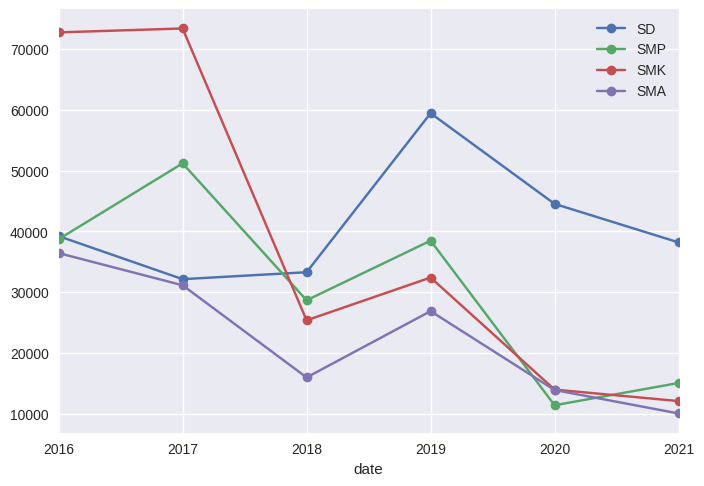

In [41]:
aps.plot(marker="o")
plt.show()

### Persentase anak yang putus sekolah kemudian menjadi pekerja di bawah umur berdasarkan provinsi di Indonesia.

In [42]:
aps_sd_provinsi = pd.read_excel('databases/labored-children/putus-sekolah-provinsi.xlsx')
aps_sd_provinsi.head()

,nama_data,value
0,DKI Jakarta,0.69
1,Kalimantan Utara,0.42
2,Gorontalo,0.31
3,Papua Barat,0.30
4,Sulawesi Selatan,0.28


In [43]:
aps_sd_provinsi.columns = ['provinsi', 'angka_putus_sekolah']
aps_sd_provinsi.head()

,provinsi,angka_putus_sekolah
0,DKI Jakarta,0.69
1,Kalimantan Utara,0.42
2,Gorontalo,0.31
3,Papua Barat,0.30
4,Sulawesi Selatan,0.28


In [44]:
aps_sd_provinsi['provinsi'] = aps_sd_provinsi.provinsi.str.upper()
aps_sd_provinsi.loc[aps_sd_provinsi['provinsi'] == 'KEPULAUAN RIAU', 'provinsi'] = 'KEP. RIAU'
aps_sd_provinsi.head()

,provinsi,angka_putus_sekolah
0,DKI JAKARTA,0.69
1,KALIMANTAN UTARA,0.42
2,GORONTALO,0.31
3,PAPUA BARAT,0.30
4,SULAWESI SELATAN,0.28


In [48]:
aps_sd_provinsi_x_anak_kerja = pd.merge(aps_sd_provinsi, persentase_pekerja_anak.T.copy(['2020']), on='provinsi', how='left')
aps_sd_provinsi_x_anak_kerja

,provinsi,angka_putus_sekolah,2018-01-01 00:00:00,2019-01-01 00:00:00,2020-01-01 00:00:00,2021-01-01 00:00:00
0,DKI JAKARTA,0.69,1.48,1.17,1.30,0.82
1,KALIMANTAN UTARA,0.42,2.11,2.66,4.84,5.66
2,GORONTALO,0.31,4.56,4.57,5.46,4.28
3,PAPUA BARAT,0.30,2.19,2.30,5.35,3.81
4,SULAWESI SELATAN,0.28,4.63,4.90,6.16,5.33
5,MALUKU UTARA,0.28,2.42,3.51,3.80,2.12
6,PAPUA,0.28,4.20,3.17,3.49,3.25
7,MALUKU,0.24,2.14,3.04,3.35,2.49
8,KEP. RIAU,0.23,1.09,0.98,1.19,0.97
9,SULAWESI TENGGARA,0.21,5.32,5.26,8.05,6.46


In [49]:
persentase_pekerja_anak['DKI JAKARTA']

tahun
2018-01-01    1.48
2019-01-01    1.17
2020-01-01    1.30
2021-01-01    0.82
Name: DKI JAKARTA, dtype: float64

## Tren Berhubungan dengan Kekerasan pada Anak

In [52]:
kasus_kekerasan_anak = pd.read_excel('databases/labored-children/kasus-kekerasan-anak.xlsx')
kasus_kekerasan_anak.head()

,KASUS PERLINDUNGAN ANAK,2016,2017,2018,2019,2020
0,Sosial dan Anak Dalam Situasi Darurat,236,286,302,291,128
1,Anak Terlantar (Anak Penyandang Masalah Keseja...,90,144,152,159,71
2,Balita Terlantar (Korban),21,37,35,29,8
3,Anak Terlantar (Korban),26,30,28,33,12
4,Anak Mengemis (Korban),13,16,17,16,6


In [53]:
kasus_kekerasan_anak = kasus_kekerasan_anak.T
kasus_kekerasan_anak['total'] = kasus_kekerasan_anak.sum(axis=1)
kekerasan_per_tahun = kasus_kekerasan_anak[['total']]
kekerasan_per_tahun.head()

,total
KASUS PERLINDUNGAN ANAK,Sosial dan Anak Dalam Situasi DaruratAnak Terl...
2016,9255
2017,9243
2018,9846
2019,8829


In [54]:
kekerasan_per_tahun.drop('KASUS PERLINDUNGAN ANAK', axis=0, inplace=True)
kekerasan_per_tahun.index.name = 'tahun'
kekerasan_per_tahun.head()

<ipython-input-54-98fd61c79a20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kekerasan_per_tahun.drop('KASUS PERLINDUNGAN ANAK', axis=0, inplace=True)


,total
tahun,
2016,9255
2017,9243
2018,9846
2019,8829
2020,12098


In [55]:
kekerasan_per_tahun.index = pd.to_datetime(kekerasan_per_tahun.index.astype(str))

In [56]:
kekerasan_per_tahun.total.dtype

dtype('O')

In [57]:
kekerasan_per_tahun["total"] = kekerasan_per_tahun["total"].astype(int)

<ipython-input-57-4872baed2bcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kekerasan_per_tahun["total"] = kekerasan_per_tahun["total"].astype(int)


In [58]:
kekerasan_per_tahun.to_csv('databases/labored-children-cleaned/kekerasan_per_tahun.csv')

In [59]:
persentase_pekerja_anak["INDONESIA"].corr(kekerasan_per_tahun["total"])

0.9997034982261999

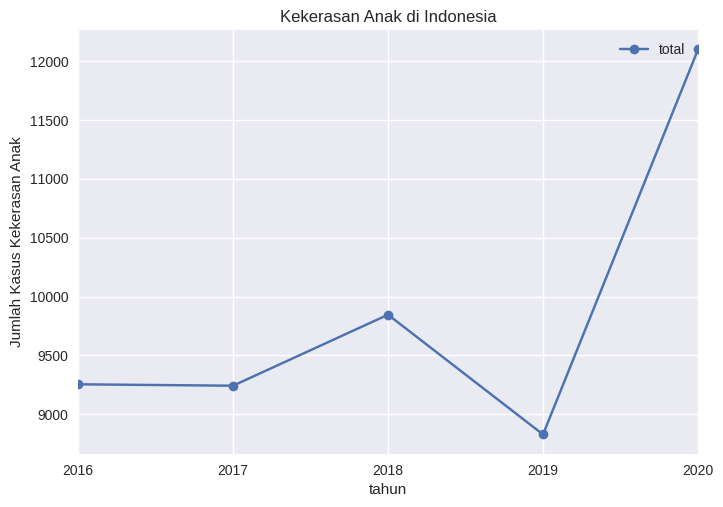

In [60]:
kekerasan_per_tahun.plot(marker="o")
plt.title('Kekerasan Anak di Indonesia')
plt.ylabel('Jumlah Kasus Kekerasan Anak')
plt.show()